In [2]:
import matplotlib.pyplot as plt
import matplotlib
import math as math
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats

In [3]:
def invFx1(u):
    if u < 0.5:
        b = math.sqrt(u/2)
    else:
        b = - math.sqrt(-(u - 1 )/2) + 1
    return b

In [4]:
def invFx2(u):
    if u < 0.5:
        b = math.sqrt(u/2)
    else:
        b = - math.sqrt(-(u - 1 )/2) + 1
    return b

In [5]:
def invFyxx2(u):
    random = np.random.uniform(0,1,1)
    if u < 0.5:
        b = random * (2 * u) + 1 - 2 * u
    else:
        b = random * (2 - 2 * u ) -1 + 2* u
    return b

In [6]:
def invFyxx1(u):
    random = np.random.uniform(0,1,1)
    if u < 0.5:
        b = random * (2 * u) 
    else:
        b = random * (2 - 2 * u)
    return b

In [7]:
def makePoint(coin, random):
    if coin > 0.5:
        return (tB, '')

In [28]:
#randomValues = np.random.uniform(0,1,n)
#x = list(map(invFx1, randomValues))
#y = list(map(invFyxx1, x))

#randomValues = np.random.uniform(0,1,n)
#x2 = list(map(invFx2, randomValues))
#y2 = list(map(invFyxx2, x2))

In [29]:
def makeSample(c):
    if c > 0.5:
        x = invFx1(np.random.uniform(0,1,1))
        y = invFyxx1(x)
        clas = 0
    else:
        x = invFx2(np.random.uniform(0,1,1))
        y = invFyxx2(x)
        clas = 1
    return (x,y, clas)

In [30]:
def makeGrid(h,x0,x1):
    grid = pd.DataFrame(columns=['height', 'width', 'rx', 'ry'])
    k = 0
    for i in np.arange(x0,x1,h): 
        for j in np.arange(x0,x1,h):
            grid.loc[k] = [h,h, i, j]
            k = k +1
    return grid

In [31]:
def inRectangle(x,y, rx,ry, w,d):
    return x >= rx and rx + w > x and y >= ry and ry + h > y

In [44]:
n = 1000
coins = np.random.uniform(0,1,n)
points = map(makeSample, coins)
h = 0.1#1/pow(n, 1/4)

grid = makeGrid(h,0,1)
x,y,c = zip(*points)
arr = np.array(list(zip(x,y,c)))
data = pd.DataFrame(data=arr,columns=['x','y','class'])
data['key'] = 1
grid['key'] = 1

In [45]:
def f(x):
    return inRectangle(x[5], x[6], x[2], x[3], x[0], x[1])

In [46]:
df = grid.merge(data,how="left", on='key')
bins = df[df.apply(f, axis=1)]
df2 = bins.groupby(['rx', 'ry', 'class'])['height'].count().reset_index()
classifier = df2.loc[df2.groupby(['rx', 'ry'])['height'].idxmax()].reset_index()

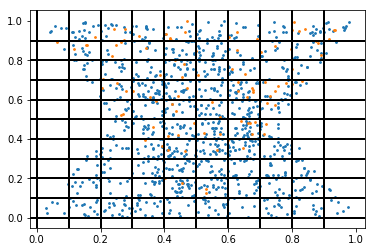

In [47]:
%matplotlib inline

plt.scatter(x,y,s=3.14)
plt.scatter(x2,y2,s=3.14)
# draw the grid
for x in np.arange(0,1,h):
    plt.axhline(x, lw=2, color='k', zorder=5)
    plt.axvline(x, lw=2, color='k', zorder=5)
    
plt.show()

ValueError: x and y must be the same size

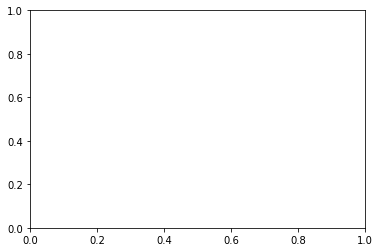

In [48]:
%matplotlib inline

plt.scatter(x,y,s=3.14)
# draw the grid
for x in np.arange(0,1,h):
    plt.axhline(x, lw=2, color='k', zorder=5)
    plt.axvline(x, lw=2, color='k', zorder=5)
    
plt.show()

(0.0, 10.0, 0.0, 10.0)

/home/event/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


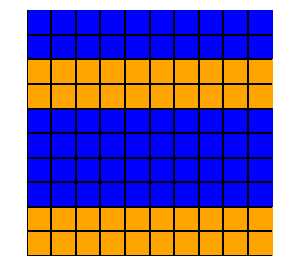

In [49]:
N = len(np.arange(0,1,h))
data = np.ones((N, N))
j = 0
i = 0
for k in range(len(classifier)):
    data[i][j] = classifier['class'][i] 
    if j == N -1:
        i = i + 1
        j = 0
    else:
        j = j + 1
    
# make a figure + axes
fig, ax = plt.subplots(1, 1, tight_layout=True)
# make color map
my_cmap = matplotlib.colors.ListedColormap(['blue', 'orange'])
# set the 'bad' values (nan) to be white and transparent
my_cmap.set_bad(color='w', alpha=0)
# draw the grid
for x in range(N):
    ax.axhline(x, lw=2, color='k', zorder=5)
    ax.axvline(x, lw=2, color='k', zorder=5)
    
# draw the boxes
ax.imshow(data, interpolation='none', cmap=my_cmap, extent=[0, N, 0, N], zorder=0)
# turn off the axis labels
ax.axis('off')